In [4]:
#mount the data on your google drive
#mounting this will help you to call the files from the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#install all the syft library required
#After installed all the library, you have to restart the code again
!pip install 'syft[udacity]'

In [5]:
# IMPORT MODULES
# TURN ON the GPU !
#import all the required libraries

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
#from sklearn.utils.fixes import signature
#from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.preprocessing import shuffle_arrays_unison

import tensorflow as tf

#from keras import models, regularizers, layers, optimizers, losses, metrics
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
#from keras.utils import to_categorical



In [ ]:
!ls

gdrive	mimic3d.csv  sample_data


In [6]:
#upload the dataset from your device
from google.colab import files
uploaded = files.upload()

Saving mimic3d.csv to mimic3d.csv


In [7]:
#call the dataset and data preprocessing
data = pd.read_csv('mimic3d.csv')
print("With id", data.shape)
data_full = data.drop('hadm_id', 1)
print("No id",data_full.shape)

With id (58976, 28)
No id (58976, 27)


In [8]:
# Label = LOS
#data preprocessing

y = data_full['LOSgroupNum']
X = data_full.drop('LOSgroupNum', 1)
X = X.drop('LOSdays', 1)
X = X.drop('ExpiredHospital', 1)
X = X.drop('AdmitDiagnosis', 1)
X = X.drop('AdmitProcedure', 1)
X = X.drop('marital_status', 1)
X = X.drop('ethnicity', 1)
X = X.drop('religion', 1)
X = X.drop('insurance', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (58976,)
X - No Label No id  (58976, 18)
Index(['gender', 'age', 'admit_type', 'admit_location', 'NumCallouts',
       'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput', 'NumLabs',
       'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents',
       'NumTransfers', 'NumChartEvents', 'TotalNumInteract'],
      dtype='object')


In [9]:
print(X.shape)
categorical_columns = [
                    'gender',                     
                    'admit_type',
                    'admit_location'
                      ]

for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(58976, 18)
(58976, 30)


In [10]:
print(data_full.shape)
print(X.shape)
#XnotNorm = np.array(X.copy())
XnotNorm = X.copy()
print('XnotNorm ', XnotNorm.shape)

ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)   #data normalization

(58976, 27)
(58976, 30)
XnotNorm  (58976, 30)
ynotNorm  (58976,)


In [11]:
# Normalize X

x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
print(XNorm)
#print(y)
print('X normalized')

            age  ...  TRSF WITHIN THIS FACILITY
0     -0.691792  ...                  -0.009208
1      0.230296  ...                  -0.009208
2     -0.192328  ...                  -0.009208
3      0.768180  ...                  -0.009208
4      0.268716  ...                  -0.009208
...         ...  ...                        ...
58971  0.268716  ...                  -0.009208
58972  0.191876  ...                  -0.009208
58973 -1.152835  ...                  -0.009208
58974  0.614499  ...                  -0.009208
58975  1.344485  ...                  -0.009208

[58976 rows x 30 columns]
X normalized


In [12]:
# SPLIT data into Train & Test
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.01, random_state=7)
#X_train=XNorm[0:58386]
#y_train=y[0:58386]
#X_test=XNorm[58386:58386+590]
#y_test=y[58386:58386+590]
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (58386, 30)
X_test:  (590, 30)
y_train:  (58386,)
y_test:  (590,)


In [13]:
#categorical of y_data
y_test=y_test.values.tolist()
y_train=y_train.values.tolist()


In [14]:
X_train=pd.DataFrame(X_train).to_numpy()
#y_train=pd.DataFrame(y_train).to_numpy()
X_test=pd.DataFrame(X_test).to_numpy()
#y_test=pd.DataFrame(y_test).to_numpy()

In [15]:
#devide the data into m model owners
import numpy as np

j=0
M=10  #number of model owners=10
number=len(X_train)
k=number/M
#print(x_train)

for x in range(0,M):
             globals()['x_train_split%s' % x]=X_train[int(j):int(k+j)]
             globals()['y_train_split%s' % x]=y_train[int(j):int(k+j)]
             j=k
print(x_train_split0.shape)

(5838, 30)


In [16]:
#take 500 test data from all test datasets
x_test=X_test[0:500]
y_test=y_test[0:500]
#y_train.shape

In [ ]:
#import all the torch libraries as we are going to use pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
#initialize required parameters
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
#import the syft libraries
#create two virtual workers and one crypto_provider
import syft as sy
hook = sy.TorchHook(torch) 
client = sy.VirtualWorker(hook, id="client")
bob = sy.VirtualWorker(hook, id="bob")
alice = sy.VirtualWorker(hook, id="alice")
crypto_provider = sy.VirtualWorker(hook, id="crypto_provider")

Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/usr/local/lib/python3.6/dist-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.15.4.so'


In [ ]:
epochs = 80  #number of epoches


In [ ]:
#argument function
class Arguments():
    def __init__(self):
        self.batch_size = 64
        self.test_batch_size = 50
        self.epochs = epochs
        self.lr = 0.001
        self.log_interval = 100

args = Arguments()

In [ ]:
#transform all numpy train vectors into torch tensor
for i in range(0,M):
     globals()['tensor_x%s' % i] =torch.Tensor(globals()['x_train_split%s' % i]) # transform to torch tensor
     globals()['tensor_y%s' % i] = torch.Tensor(globals()['y_train_split%s' % i])
     globals()['tensor_y%s' % i]=globals()['tensor_y%s' % i].type(torch.LongTensor)

In [ ]:
#transform test vectors into torch tensor
test_x=torch.Tensor(x_test)
test_y=torch.Tensor(y_test)
#tensor_x=tensor_x.type(torch.LongTensor)
#test_x=test_x.type(torch.LongTensor)
test_y=test_y.type(torch.LongTensor)

In [ ]:
for iter in range(0,M):
  globals()['my_dataset%s' % iter] = TensorDataset(globals()['tensor_x%s' % iter],globals()['tensor_y%s' % iter]) 
  globals()['train_loader%s' % iter] = DataLoader(globals()['my_dataset%s' % iter],batch_size=args.batch_size)

In [ ]:
#create test dataset
test_datasets=TensorDataset(test_x,test_y) 
test_case_loader=DataLoader(test_datasets)

In [ ]:
test_loader = DataLoader(test_datasets,batch_size=args.test_batch_size)

In [ ]:
#create private test loader where client secretly shared their data to worker1 and worker2
private_test_loader = []
for data, target in test_loader:
    private_test_loader.append((
        data.fix_precision().share(alice, bob, crypto_provider=crypto_provider),
        target.fix_precision().share(alice, bob, crypto_provider=crypto_provider)
    ))

In [ ]:
#create private test loader where client secretly shared their data to worker1 and worker2
private_new_loader = []
for data, target in test_case_loader:
    private_new_loader.append((
        data.fix_precision().share(alice, bob, crypto_provider=crypto_provider),
        target.fix_precision().share(alice, bob, crypto_provider=crypto_provider)
    ))

In [ ]:
#Feed forward Neural Network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(30, 500)
        self.fc2 = nn.Linear(500, 4)

    def forward(self, x):
        x = x.view(-1, 30)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [ ]:
#training is local training so no encryption 
def train(args, model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        output = F.log_softmax(output, dim=1)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * args.batch_size, len(train_loader) * args.batch_size,
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
#train data
for iter in range (0,M):

  globals()['model%s' % iter]=Net()
  optimizer = torch.optim.Adam(globals()['model%s' % iter].parameters(), lr=args.lr)
  train_loader=0
  train_loader=globals()['train_loader%s' % iter]
  for epoch in range(1, args.epochs + 1):
     train(args, globals()['model%s' % iter], train_loader, optimizer, epoch)

In [ ]:
#test data
def test(args, model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            output = F.log_softmax(output, dim=1)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(1, keepdim=True) # get the index of the max log-probability 
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for iter in range (0,M):
     test(args, globals()['model%s' % iter], test_case_loader)

In [ ]:
#secure evaluation 
import timeit
start1 = timeit.default_timer()
for iter in range (0,M):
  globals()['model%s' % iter].fix_precision().share(alice, bob, crypto_provider=crypto_provider)
stop1 = timeit.default_timer()


In [ ]:
stop1-start1  #required time to model owner's secret share their model

0.06849979500111658

In [ ]:
def produce_probability(args, model, test_loader):
    model.eval()
    n_correct_priv = 0
    n_correct_sum = 0
    n_total = 0
    actuals = []
    predictions = []
    yhat=[]
    k=0
    with torch.no_grad():
        for data, target in test_loader[0:500]:
            output = model(data)
            #print(output.shape)
            pred = output.argmax(dim=1)
            #print(pred.shape) 
            #n_correct_priv = pred.eq(target.view_as(pred))#.sum()
            #out=n_correct_priv.copy().get().float_precision().long().item()
            #print(out)
            #n_total += args.test_batch_size
            #pred = output.argmax(dim=1) 
            #n_correct_priv += pred.eq(target.view_as(pred)).sum()
            #n_total += args.test_batch_size

            #n_correct = n_correct_priv.copy().get().float_precision().long().item()
            
            
            outputs=torch.sum(output, dim=0)
            

            #yhat=[]
            for i in range(4):
              z=0
              #z=outputs[i].copy().get().float_precision().long().item()
              z=outputs[i].copy().get().float_precision().long().item()
              
              
              z=z/10
              yhat.append(z)

            #yhat=np.clip(yhat, 0, 1)
            #k=np.argmax(yhat)
            #actuals.append(k)
            

            
    
            
            
            #print(k)
            k=k+1
    
        return yhat


            

In [ ]:
from joblib import Parallel, delayed

In [ ]:
import timeit

start = timeit.default_timer()
def training(iter):
#for iter in range(0,10):
    y_actual=produce_probability(args,globals()['model%s' % iter],private_new_loader)
    y_array=np.array(y_actual)
    y_probability=y_array.reshape(500,4)
    import pandas as pd 
  #'y'+str(iter)=y_probability
    pd.DataFrame(y_probability).to_csv('/content/gdrive/.....'+'y'+str(iter)+'.csv') #save inference files in your directory
   #iter=iter+1
  

#stop = timeit.default_timer()

Parallel(n_jobs=1, require='sharedmem')(
 delayed(training)(i) for i in range(9,10))
stop = timeit.default_timer()

In [ ]:
print('Time: ', stop - start) 

Time:  1552.9209599880014


In [1]:
#compute label
def label(my_list):
  import numpy as np
  my_array=np.array(my_list)
  p=np.zeros(my_array.shape)
  b=my_array.max(-1)
  condition = my_array == b[..., np.newaxis]
  c = np.where(condition, 1, 0)
  final=np.multiply(c, my_array)
  #my_sum=np.sum(final,axis=0)
  labels=np.argmax(final, axis=1)
  return labels

In [2]:
#function for vote counting
def vote(my_list):
  import numpy as np
  my_array=np.array(my_list)
  p=np.zeros(my_array.shape)
  b=my_array.max(-1)
  condition = my_array == b[..., np.newaxis]
  c = np.where(condition, 1, 0)
  final=np.multiply(c, my_array)
  #my_sum=np.sum(final,axis=0)
  labels=np.argmax(final, axis=1)
  return c

In [17]:
from sklearn.metrics import accuracy_score
y_pred=y_test[0:500]    #total prediction vector/actual prediction
#y_pred

In [18]:
#df=pd.read_csv('y0.csv')
#define vector of zeros
df=np.zeros(500*4)
df=df.reshape(500,4)

In [20]:
#call the saved prediction output from the drive
import timeit

start = timeit.default_timer()
from google.colab import drive 
import pandas as pd
sum=np.zeros(500*4)
sum=sum.reshape(500,4)
for iter in range (0,10):
  y=np.zeros(df.shape)
  y=pd.read_csv('......../Hospitals10/'+'y'+str(iter)+'.csv')   #save your drive name where the inference vector are saved
  #y=y_probability
  y=y.drop(columns='Unnamed: 0')
  yd=pd.DataFrame(y).to_numpy()
  #yd=yd*10
  yd=vote(yd)
  sum=yd+sum

stop = timeit.default_timer()
print(stop-start)


0.040931784999997944


In [ ]:
#create the labels
lab=label(sum)
sum

In [22]:
#clear accuracy
accuracy_score(y_pred,lab)*100

80.60000000000001

In [ ]:
#Client_acc_40_C=np.zeros(len(noise))

In [26]:
#Client_acc_40=np.zeros(len(noise))
#Client_acc_20=np.zeros(len(noise))
Client_acc_10=np.zeros(len(noise))   #compute accuracy for 10 number of model owners

In [24]:
#add noise 
def add_noise_sum(noise,sum,experiment,ypred):
  sum_s=sum
  predt=np.zeros(experiment)
  for i1 in range(experiment):
    sum_s=np.zeros(sum.shape)
    sum_f=sum+np.random.laplace(loc=0.0, scale=1/noise)
    sum2=label(sum_f)
    predt[i1]=accuracy_score(ypred,sum2)
    #print(i)
  pred=np.average(predt)
  #print(predt)
  #print(pred)
  return pred
    

In [30]:
noise=[.01,.02,.03, .05,.1,.3,.5,.7,.9,1]  #noise
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
#Noise after Aggregation Method
for i in range(0,len(noise)):
                          sum_s=np.zeros(sum.shape)
                 #sum2=np.zeros(sum1.shape)
                 #predF=0
                 #y_label=0
                          sum_n=sum
                          #sum_s=sum_n+np.random.laplace(loc=0.0, scale=1/noise[i])
                          predF=add_noise_sum(noise[i],sum_n,50,y_pred)
                          #print(sum_s)

                          #sum2=label(sum_s)
                          #print(sum2)
                          #y_label=label(y_test)
                          #predF=accuracy_score(y_pred,sum2)
#predF=average_precision_score(y_test,sum2)
#print(predF)
                          Client_acc_10[i]=predF*100
print(Client_acc_10)
#print(Client_acc1)
print(noise)

[49.144 50.68  53.672 50.6   70.084 80.56  80.6   80.6   80.6   80.6  ]
[0.01, 0.02, 0.03, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1]


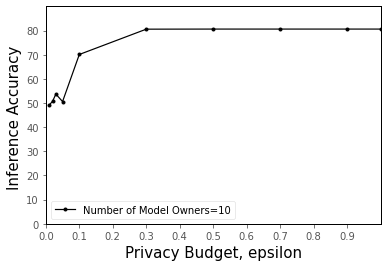

In [31]:
import matplotlib.pyplot as plt
from google.colab import files
# plotting the points 
test1 = plt.figure()
#plt.plot(noise, Client_acc_40, linestyle='--',marker='.',color='blue',label='Number of Model Owners=40',linewidth=1.2)  
#plt.plot(noise, Client_acc_20,linestyle='--', marker='.',color='red',label='Number of Model Owners=20',linewidth=1.2)  
plt.plot(noise, Client_acc_10, marker='.',color='black',label='Number of Model Owners=10',linewidth=1.2) 
# naming the x axis 
x=plt.xlabel('Privacy Budget, epsilon', fontsize='15') 
x.set_color("black")
# naming the y axis 
y=plt.ylabel('Inference Accuracy ',fontsize='15') 
y.set_color("black")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.ylim((0,90))
plt.xlim((0,1)) 
plt.xticks(np.arange(0, 1, .1)) 
plt.yticks(np.arange(0, 90, 10))
plt.grid(b=None)
#acc_final
#plt.legend()

plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
test1.show()
test1.set_facecolor('white')
test1.savefig('test1.pdf')
#files.download('test1.pdf')

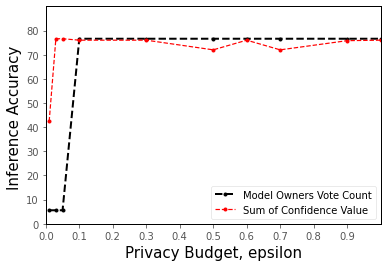

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files
# plotting the points 
test1 = plt.figure()
plt.plot(noise, Client_acc_40,linestyle='--', marker='.',color='black',label='Model Owners Vote Count',linewidth=2) 
plt.plot(noise, Client_acc_40_C,linestyle='--', marker='.',color='red',label='Sum of Confidence Value',linewidth=1.2)  
#plt.plot(noise, Client_acc_10,linestyle='--', marker='*',color='blue',label='Number of Model Owners=10',linewidth=1.2) 
# naming the x axis 
x=plt.xlabel('Privacy Budget, epsilon', fontsize='15') 
x.set_color("black")
# naming the y axis 
y=plt.ylabel('Inference Accuracy ',fontsize='15') 
y.set_color("black")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.ylim((0,90))
plt.xlim((0,1)) 
plt.xticks(np.arange(0, 1, .1)) 
plt.yticks(np.arange(0, 90, 10))
plt.grid(b=None)
#acc_final
#plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.legend(loc=4)
test1.show()
test1.set_facecolor('white')
test1.savefig('test1.pdf')
#files.download('test1.pdf')